**Using Evaluation Utils**:

In this notebook, we discuss how to use the provided utilities file to compare models on numerous metrics on different problems at the same time

In [1]:
import evaluation
import load_data
import Padgan_variants
import utils
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import Padgan_variants
import VAEs

c:\Users\Lyle\Documents\Files\DeCoDE\DGM-Evaluation-Metrics\Padgan_variants.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


**Setting up DGMS**:

Let's create a pandas series with several DGMs

In [2]:
reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [128, 1e-3, 1e-3, 1, 0, 4, 2000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]

methods=pd.Series()
methods["GAN"] = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)
methods["VAE"] = VAEs.VAE_wrapper([100, 128, 1e-3, 4, .05, False])

C:\Users\Lyle\AppData\Local\Temp\ipykernel_13888\2405019141.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  methods=pd.Series()


**Setting up Problems**

The utilities provided expect each function to be specified as a list of the following components:
- Dataset function that returns a) valid samples and b) invalid samples (used for some constraint satisfaction metrics)
- Validity check function
- Objective functions in a list
- Plotting Range
- Conditioning Function 
- Condition Value

Unused components can be left as None

In [3]:
functions=[]

DM_val = load_data.all_val_wrapper() #This function sets any and all datapoints as valid

pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func_1 = load_data.sample_circle_blobs_wrapper(10000, 0, 6, 1.3, 0.22) #Uniform Sampling with Number of positive samples & Negative Samples
sampling_func_2 = load_data.sample_circle_blobs_wrapper(10000, 0, 2, 1.3, 0.22) #Uniform Sampling with Number of positive samples & Negative Samples

rangearr = np.array([[-2,2], [-2,2]])

# We provide a dataset generator wrapper function using our sampling functions and the validity function
dataset_func_1 = load_data.get_dataset_func(sampling_func_1, DM_val, rangearr)
dataset_func_2 = load_data.get_dataset_func(sampling_func_2, DM_val, rangearr)

functions.append([dataset_func_1, DM_val, None, rangearr, None, None])
functions.append([dataset_func_2, DM_val, None, rangearr, None, None])

**Setting Up Metrics**:
We set up the metrics we want to evaluate in a pandas series. 
Each entry consists of:
metrics["name"] = ["direction", metric wrapper]

- name is a name you are assigning to the metrics
- direction is either "minimize" or "maximize"
- metric wrapper is the a wrapper function of the desired metric with any hyperparameters specified

In [4]:
metrics=pd.Series()
metrics["Nearest Dataset Sample"] = ["minimize", evaluation.gen_data_distance_wrapper("x", "min")]
metrics["Nearest Generated Sample"] = ["minimize", evaluation.data_gen_distance_wrapper("x", "min")]
metrics["F1"] = ["maximize", evaluation.F_wrapper("x", 1)]
metrics["F10"] = ["maximize", evaluation.F_wrapper("x", 10)]
metrics["F0.1"] = ["maximize", evaluation.F_wrapper("x", 0.1)]
metrics["AUC-PR"] = ["maximize", evaluation.AUC_wrapper("x")]
metrics["MMD"] = ["minimize", evaluation.MMD_wrapper("x")]

C:\Users\Lyle\AppData\Local\Temp\ipykernel_13888\3187865464.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  metrics=pd.Series()


**General Parameters**

We set up some flags and general settings:

In [5]:
numgen = 1000 #Number of samples to generate
numanim = 5 #Number of intermediate training steps to animate and use for training plots
numinst = 3 #Number of instantiations to test
scaling = True #Scale or not
scorebars = True #Print progress for scoring functions

np.random.seed(0)

validity_status = 0 #whether we are considering constraints
obj_status = 0 #whether we are considering functional performance
conditional_status = 0 #whether we are considering conditioning
cond_dist=False #Whether conditional metrics are compared against conditional or marginal distribution

**fit_and_generate**
We call fit_and_generate from the utilities file to generate the datasets and train the models. 
fit_and_generate takes:
- functions: Our list of functions defined earlier
- methods: Our list of methods defined earlier
- numinst: How many model instantiations to test
- numgen: How many points to sample from each generated model
- scaling: Whether to scale the datasets before training
- obj_status: #wheteher we are considering functional performance
- conditional_status: Whether we are considering conditioning
- holdout: fraction of dataset to hold out during training (used for rediscovery)

The fit_and_generate function returns a timestamp in a string corresponding to the folder in which the results are saved. 

In [6]:
timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, obj_status, conditional_status, 0)

Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/2000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231128-235929/Models/GAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20231128-235929/Models/GAN_Problem_0_Instance_0_discriminator\assets


VAE Training::   0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231128-235929/Models/VAE_Problem_0_Instance_0_encoder\assets
INFO:tensorflow:Assets written to: Results/20231128-235929/Models/VAE_Problem_0_Instance_0_decoder\assets
Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/2000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231128-235929/Models/GAN_Problem_0_Instance_1_generator\assets
INFO:tensorflow:Assets written to: Results/20231128-235929/Models/GAN_Problem_0_Instance_1_discriminator\assets


VAE Training::   0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231128-235929/Models/VAE_Problem_0_Instance_1_encoder\assets
INFO:tensorflow:Assets written to: Results/20231128-235929/Models/VAE_Problem_0_Instance_1_decoder\assets
Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/2000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231128-235929/Models/GAN_Problem_0_Instance_2_generator\assets
INFO:tensorflow:Assets written to: Results/20231128-235929/Models/GAN_Problem_0_Instance_2_discriminator\assets


VAE Training::   0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231128-235929/Models/VAE_Problem_0_Instance_2_encoder\assets
INFO:tensorflow:Assets written to: Results/20231128-235929/Models/VAE_Problem_0_Instance_2_decoder\assets
Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/2000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231128-235929/Models/GAN_Problem_1_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20231128-235929/Models/GAN_Problem_1_Instance_0_discriminator\assets


VAE Training::   0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231128-235929/Models/VAE_Problem_1_Instance_0_encoder\assets
INFO:tensorflow:Assets written to: Results/20231128-235929/Models/VAE_Problem_1_Instance_0_decoder\assets
Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/2000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231128-235929/Models/GAN_Problem_1_Instance_1_generator\assets
INFO:tensorflow:Assets written to: Results/20231128-235929/Models/GAN_Problem_1_Instance_1_discriminator\assets


VAE Training::   0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231128-235929/Models/VAE_Problem_1_Instance_1_encoder\assets
INFO:tensorflow:Assets written to: Results/20231128-235929/Models/VAE_Problem_1_Instance_1_decoder\assets
Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/2000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231128-235929/Models/GAN_Problem_1_Instance_2_generator\assets
INFO:tensorflow:Assets written to: Results/20231128-235929/Models/GAN_Problem_1_Instance_2_discriminator\assets


VAE Training::   0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231128-235929/Models/VAE_Problem_1_Instance_2_encoder\assets
INFO:tensorflow:Assets written to: Results/20231128-235929/Models/VAE_Problem_1_Instance_2_decoder\assets


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

**score**:
Next, we score the generated models. The scroring utilities function takes:
- timestr: the timestring corresponding to the results we want to evaluate
- functions: Our list of functions defined earlier
- methods: Our list of methods defined earlier
- metrics: The metrics to test
- numinst: How many model instantiations to test
- scaling: Whether to scale the datasets before training 
- cond_dist: Whether conditional metrics are compared against conditional or marginal distribution
- scorebars: Whether to print progress bars/ evaluation status

score saves scores in the folder indicated by timestr.

In [7]:
import importlib
importlib.reload(evaluation)
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\Lyle\\Documents\\Files\\DeCoDE\\DGM-Evaluation-Metrics\\utils.py'>

Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.15it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  3.19it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.22it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.17it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.35it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.80it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  1.92it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.27it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.66it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.19it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.06it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.14it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.85it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.18it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.16it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  1.93it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.84it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.39it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.21it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.16it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.19it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  3.11it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.02it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.37it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.29it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.67it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.14it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.19it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.71it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.37it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.29it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.01it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.95it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.28it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.12it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.02it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.93it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.05it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.22it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.26it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.29it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  3.33it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.17it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.25it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.56it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.86it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.09it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.14it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.91it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.38it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.20it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.09it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.87it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.11it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.12it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.16it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.93it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.24it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.37it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.35it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy


<Figure size 432x288 with 0 Axes>

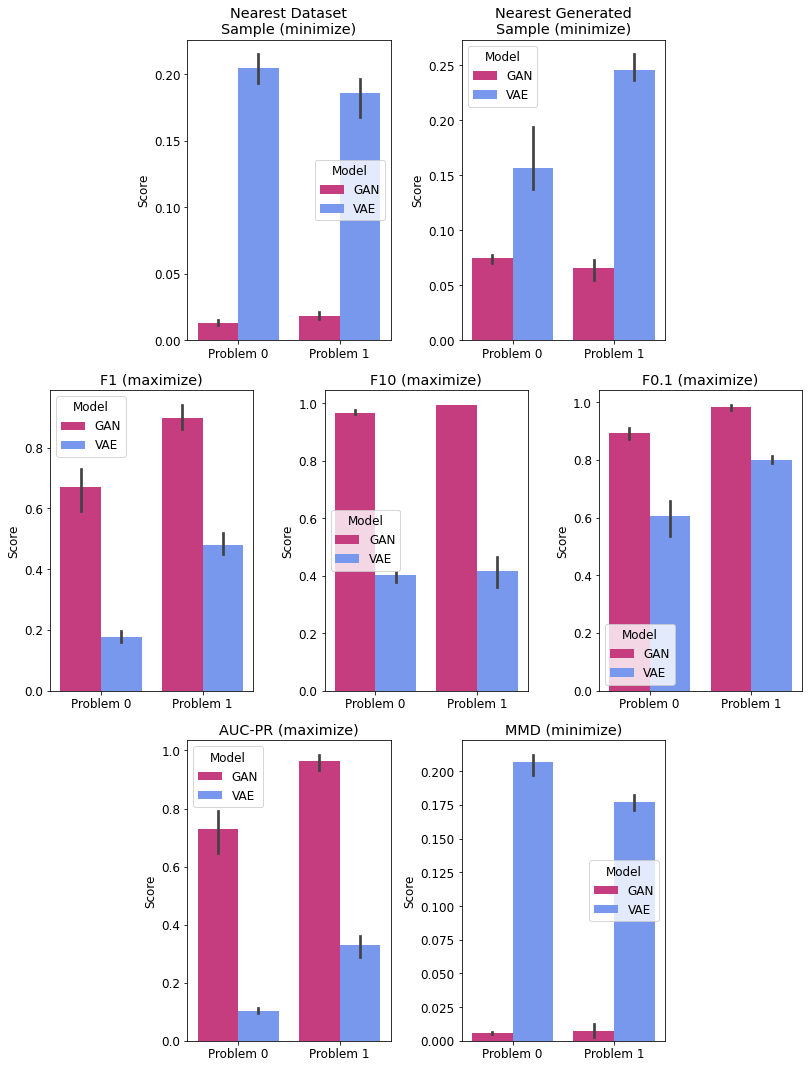

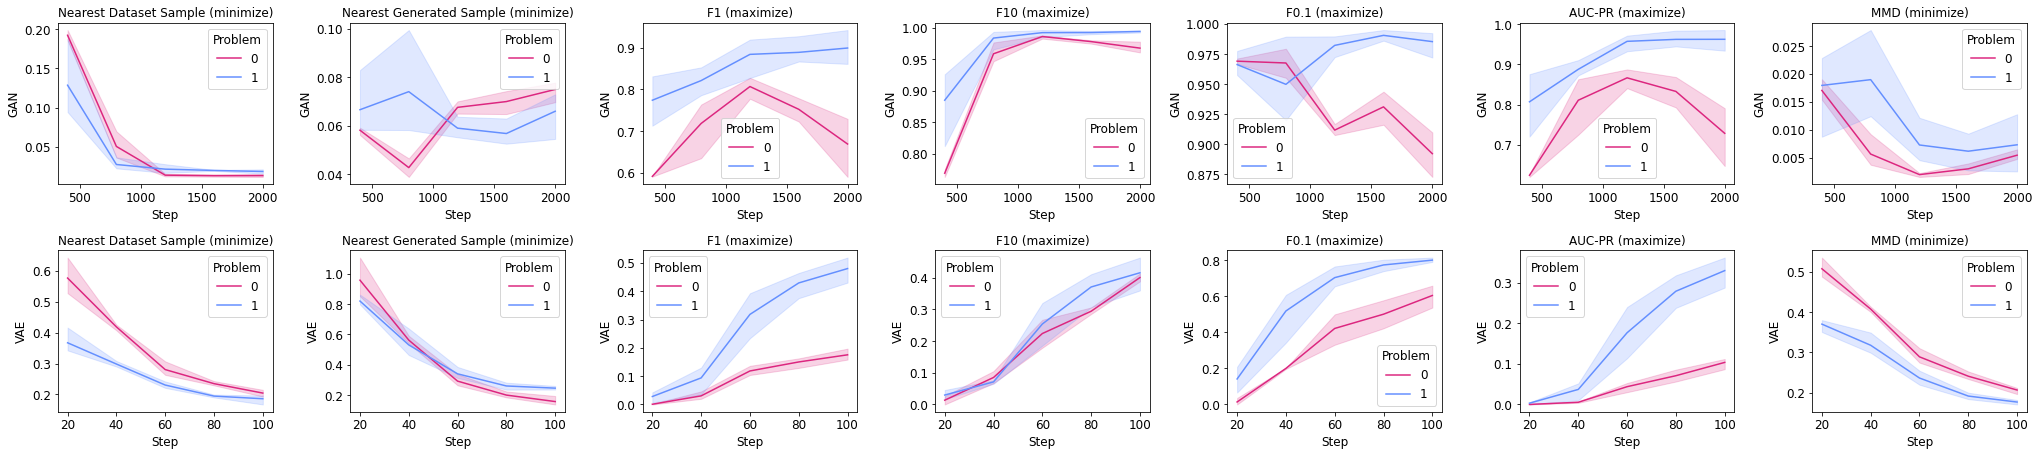

Problem 1 Scores:,GAN,VAE
Nearest Dataset Sample,0.013±0.002,0.205±0.009
Nearest Generated Sample,0.075±0.004,0.157±0.026
F1,0.669±0.058,0.175±0.016
F10,0.968±0.007,0.401±0.016
F0.1,0.892±0.015,0.604±0.050
AUC-PR,0.729±0.060,0.104±0.012
MMD,0.005±0.001,0.207±0.007


Problem 2 Scores:,GAN,VAE
Nearest Dataset Sample,0.018±0.002,0.186±0.013
Nearest Generated Sample,0.066±0.008,0.245±0.010
F1,0.899±0.033,0.480±0.037
F10,0.994±0.001,0.416±0.043
F0.1,0.985±0.009,0.800±0.010
AUC-PR,0.962±0.021,0.330±0.031
MMD,0.007±0.004,0.177±0.005


Average scores:,GAN,VAE
Nearest Dataset Sample,0.016±0.003,0.195±0.014
Nearest Generated Sample,0.071±0.008,0.201±0.048
F1,0.784±0.124,0.328±0.155
F10,0.981±0.014,0.408±0.033
F0.1,0.939±0.048,0.702±0.104
AUC-PR,0.846±0.125,0.217±0.116
MMD,0.006±0.003,0.192±0.016


In [8]:
utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars, plotscores=True)

**plot_all**: 
Next, we plot the generated distributions. The plotting function takes:

- timestr: the timestring corresponding to the results we want to evaluate
- functions: Our list of functions defined earlier
- methods: Our list of methods defined earlier
- numinst: How many model instantiations to test
- scaling: Whether to scale the datasets before training 
- validity_status:whether we are considering constraints
- obj_status: whether we are considering functional performance
- conditional_status: whether we are considering conditioning
- cond_dist: Whether conditional metrics are compared against conditional or marginal distribution

plot saves plots in the folder indicated by timestr. If numinst is greater than 1, saves an animation of the plots

**NOTE: PLOTTING FUNCTIONALITY IS ONLY BUILT FOR 2D PROBLEMS!**

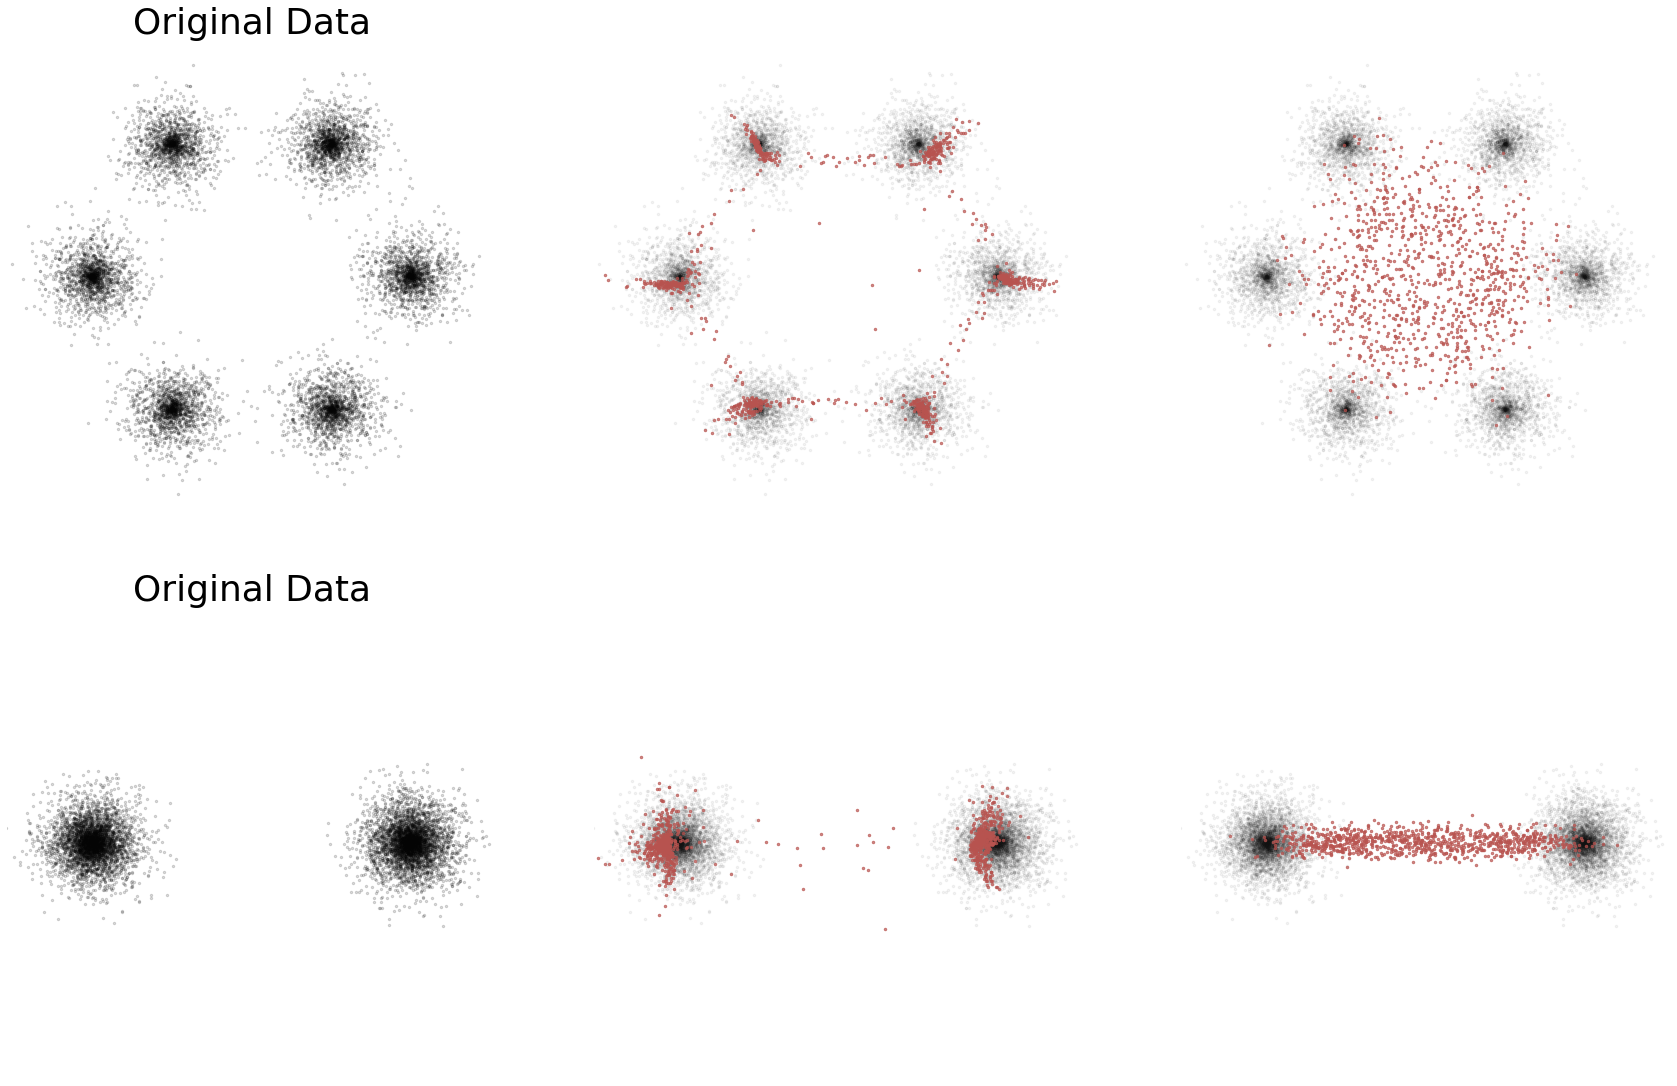

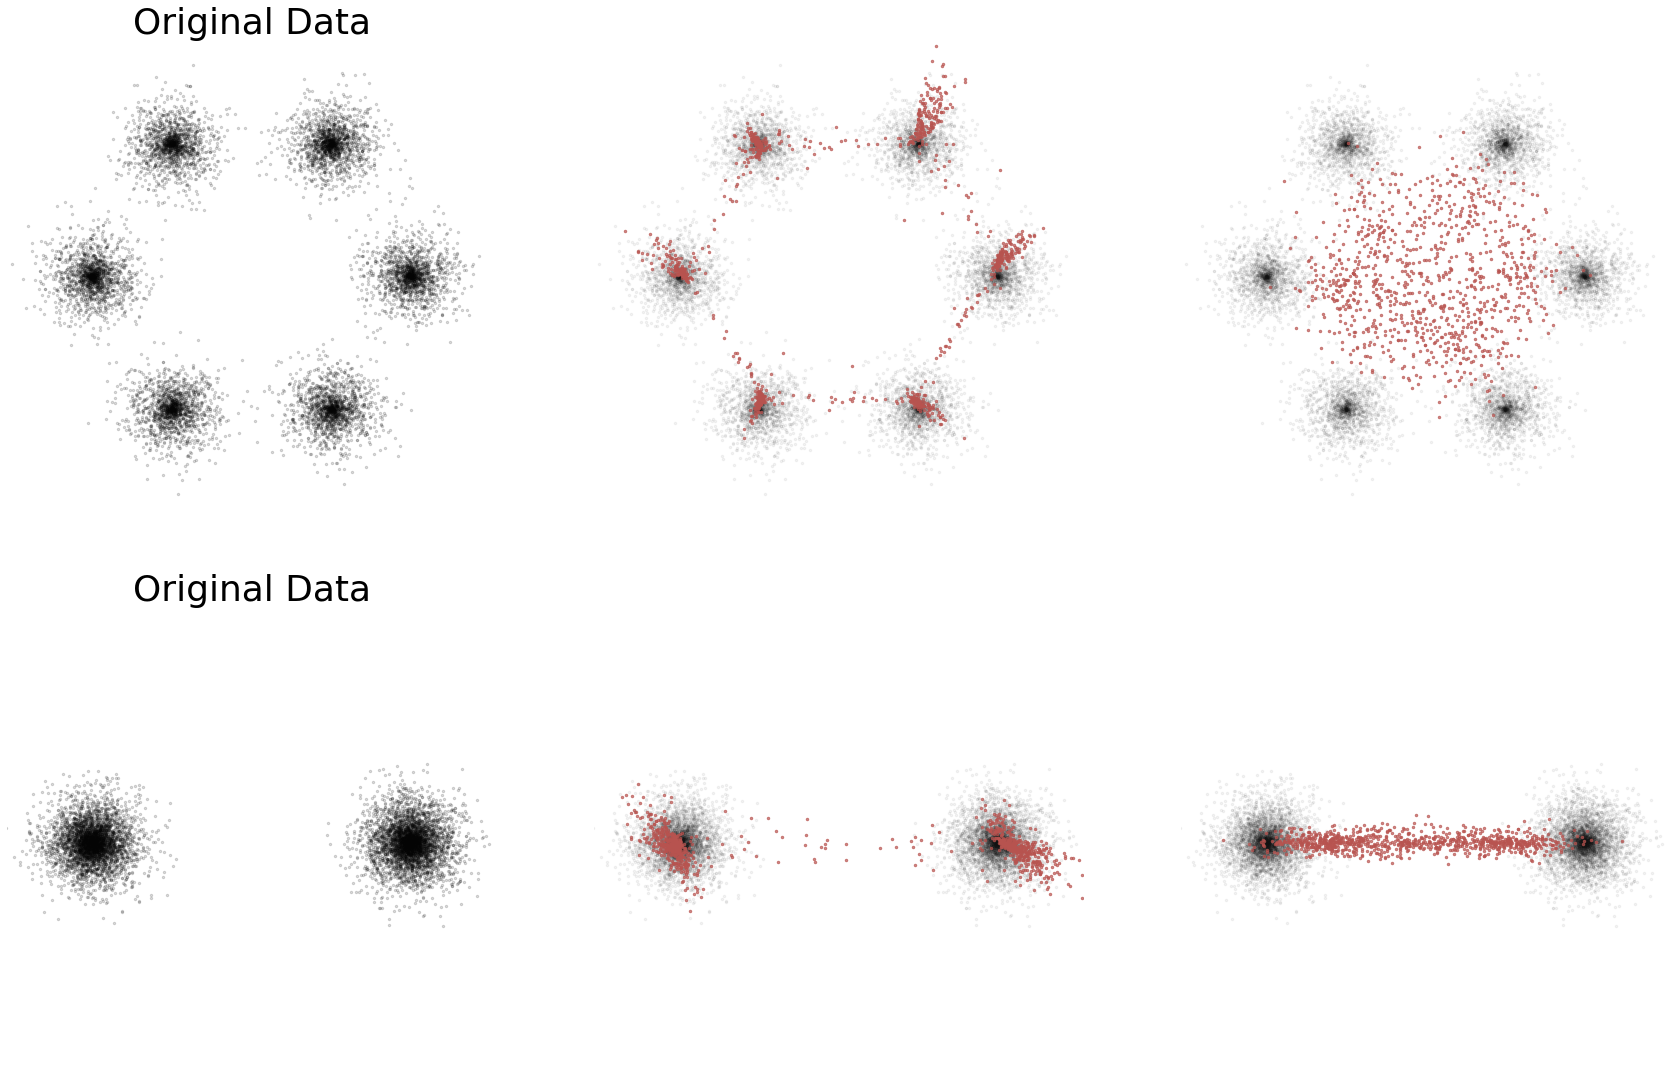

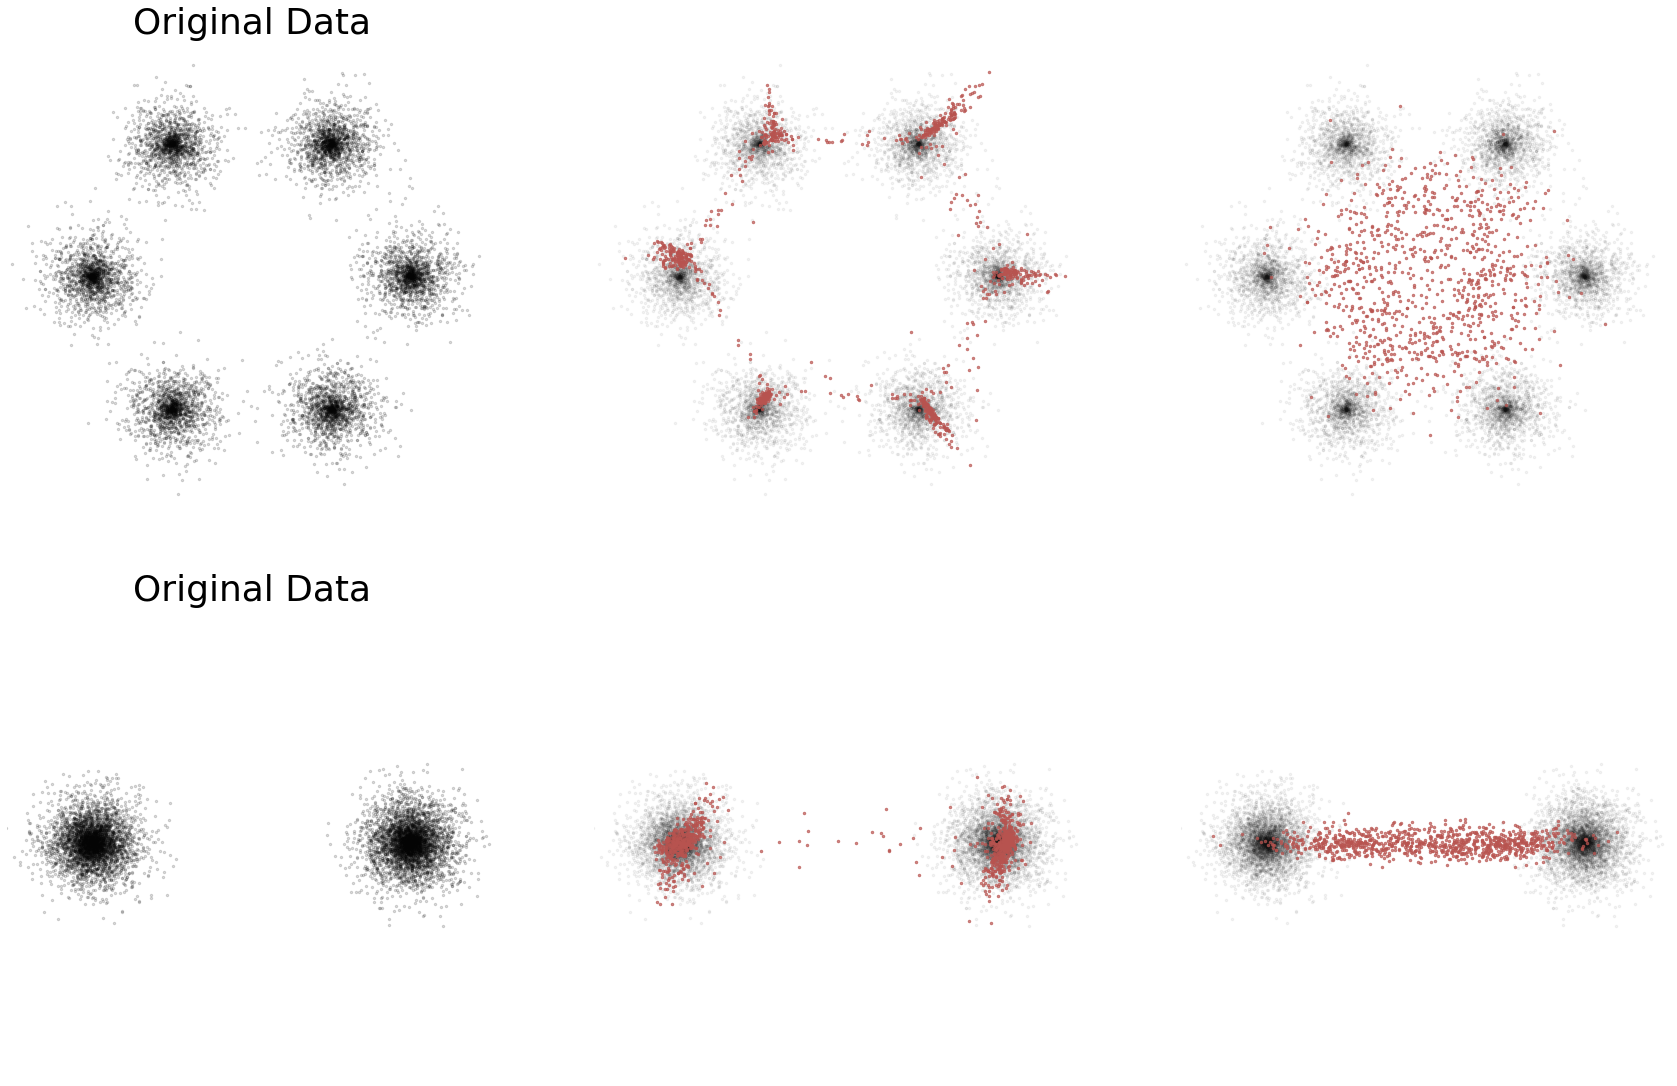

In [9]:
utils.plot_all(timestr, functions, methods, numinst, scaling, validity_status, obj_status, conditional_status, cond_dist, "red")

**Special Metrics**

When working with a few special types of metrics we must do some special setup. For rediscovery, we must designate a holdout fraction which we pass to fit_and_generate. For ML efficacy, we must include an auxiliary predictive task. In this case, we encode this predictive task in an objective function. Objectives are also used when considering performance attributes of designs.

In [10]:
#Rediscovery needs special handling in the utils file. 
#We pass in a special flag: "Rediscovery" to trigger this handling. See utils file for more info
metrics["Rediscovery"] = ["minimize", "Rediscovery", evaluation.data_gen_distance_wrapper("x", "min")]
holdout = 0.05 #If using rediscovery, we need to hold out a portion of the data during training

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score

metrics["ML Efficacy"] = ["maximize", evaluation.ML_efficacy_wrapper(KNeighborsRegressor(n_neighbors=5), r2_score)]

In [11]:
print(metrics)

Nearest Dataset Sample      [minimize, <function gen_data_distance_wrapper...
Nearest Generated Sample    [minimize, <function data_gen_distance_wrapper...
F1                          [maximize, <function F_wrapper.<locals>.calc_p...
F10                         [maximize, <function F_wrapper.<locals>.calc_p...
F0.1                        [maximize, <function F_wrapper.<locals>.calc_p...
AUC-PR                      [maximize, <function AUC_wrapper.<locals>.calc...
MMD                         [minimize, <function MMD_wrapper.<locals>.MMD ...
Rediscovery                 [minimize, Rediscovery, <function data_gen_dis...
ML Efficacy                 [maximize, <function ML_efficacy_wrapper.<loca...
dtype: object


In [12]:
functions=[]

DM_val = load_data.all_val_wrapper()

#In this case, we include objectives specifically for ML efficacy
DM_objs = [load_data.KNO1_a_wrapper(4,4), load_data.KNO1_b_wrapper(4,4)] 

pareto = np.stack([0.4705*np.linspace(0,1,1000), 0.4705*np.linspace(1,0,1000)], axis=1)
sampling_func_1 = load_data.sample_circle_blobs_wrapper(10000, 0, 6, 1.3, 0.22) #Uniform Sampling with Number of positive samples & Negative Samples
sampling_func_2 = load_data.sample_circle_blobs_wrapper(10000, 0, 2, 1.3, 0.22) #Uniform Sampling with Number of positive samples & Negative Samples

rangearr = np.array([[-2,2], [-2,2]])

dataset_func_1 = load_data.get_dataset_func(sampling_func_1, DM_val, rangearr)
dataset_func_2 = load_data.get_dataset_func(sampling_func_2, DM_val, rangearr)

functions.append([dataset_func_1, DM_val, DM_objs, rangearr, None, None])
functions.append([dataset_func_2, DM_val, DM_objs, rangearr, None, None])

In [13]:
timestr = utils.fit_and_generate(functions, methods, numinst, numanim, numgen, scaling, obj_status, conditional_status, holdout)

Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/2000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-000510/Models/GAN_Problem_0_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20231129-000510/Models/GAN_Problem_0_Instance_0_discriminator\assets


VAE Training::   0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-000510/Models/VAE_Problem_0_Instance_0_encoder\assets
INFO:tensorflow:Assets written to: Results/20231129-000510/Models/VAE_Problem_0_Instance_0_decoder\assets
Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/2000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-000510/Models/GAN_Problem_0_Instance_1_generator\assets
INFO:tensorflow:Assets written to: Results/20231129-000510/Models/GAN_Problem_0_Instance_1_discriminator\assets


VAE Training::   0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-000510/Models/VAE_Problem_0_Instance_1_encoder\assets
INFO:tensorflow:Assets written to: Results/20231129-000510/Models/VAE_Problem_0_Instance_1_decoder\assets
Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/2000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-000510/Models/GAN_Problem_0_Instance_2_generator\assets
INFO:tensorflow:Assets written to: Results/20231129-000510/Models/GAN_Problem_0_Instance_2_discriminator\assets


VAE Training::   0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-000510/Models/VAE_Problem_0_Instance_2_encoder\assets
INFO:tensorflow:Assets written to: Results/20231129-000510/Models/VAE_Problem_0_Instance_2_decoder\assets
Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/2000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-000510/Models/GAN_Problem_1_Instance_0_generator\assets
INFO:tensorflow:Assets written to: Results/20231129-000510/Models/GAN_Problem_1_Instance_0_discriminator\assets


VAE Training::   0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-000510/Models/VAE_Problem_1_Instance_0_encoder\assets
INFO:tensorflow:Assets written to: Results/20231129-000510/Models/VAE_Problem_1_Instance_0_decoder\assets
Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/2000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-000510/Models/GAN_Problem_1_Instance_1_generator\assets
INFO:tensorflow:Assets written to: Results/20231129-000510/Models/GAN_Problem_1_Instance_1_discriminator\assets


VAE Training::   0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-000510/Models/VAE_Problem_1_Instance_1_encoder\assets
INFO:tensorflow:Assets written to: Results/20231129-000510/Models/VAE_Problem_1_Instance_1_decoder\assets
Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


GAN Training::   0%|          | 0/2000 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-000510/Models/GAN_Problem_1_Instance_2_generator\assets
INFO:tensorflow:Assets written to: Results/20231129-000510/Models/GAN_Problem_1_Instance_2_discriminator\assets


VAE Training::   0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: Results/20231129-000510/Models/VAE_Problem_1_Instance_2_encoder\assets
INFO:tensorflow:Assets written to: Results/20231129-000510/Models/VAE_Problem_1_Instance_2_decoder\assets


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

If we want to generate bar plots of our scores, we can pass the plotscores parameter to the scoring function. Note: Scores will be plotted on the same axis, so may need to be scaled.

Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.02it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  3.42it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.19it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.65it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.30it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.94it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.36it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.34it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.87it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.71it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.36it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.16it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.82it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.36it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.24it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.30it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.69it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.29it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.38it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.17it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.32it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  3.36it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.45it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.56it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.79it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.85it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.59it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.33it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.92it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.51it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.34it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.10it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.77it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.29it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.16it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.18it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.93it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.15it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.25it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.10it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.24it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  3.24it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.36it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.37it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.27it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  3.12it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.01it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.22it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.99it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.67it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.19it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.33it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.81it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.34it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.43it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.33it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:01<00:00,  2.88it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.09it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.38it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy
Calculating Gen-Data Distance
Calculating Data-Gen Distance
Calculating F1


Calculating Precision/Recall:: 100%|==========| 5/5 [00:02<00:00,  2.30it/s]


Calculating F10
Calculating F0.1
Calculating AUC
Calculating Maximum Mean Discrepancy
Calculating Data-Gen Distance
Calculating ML Efficacy


<Figure size 432x288 with 0 Axes>

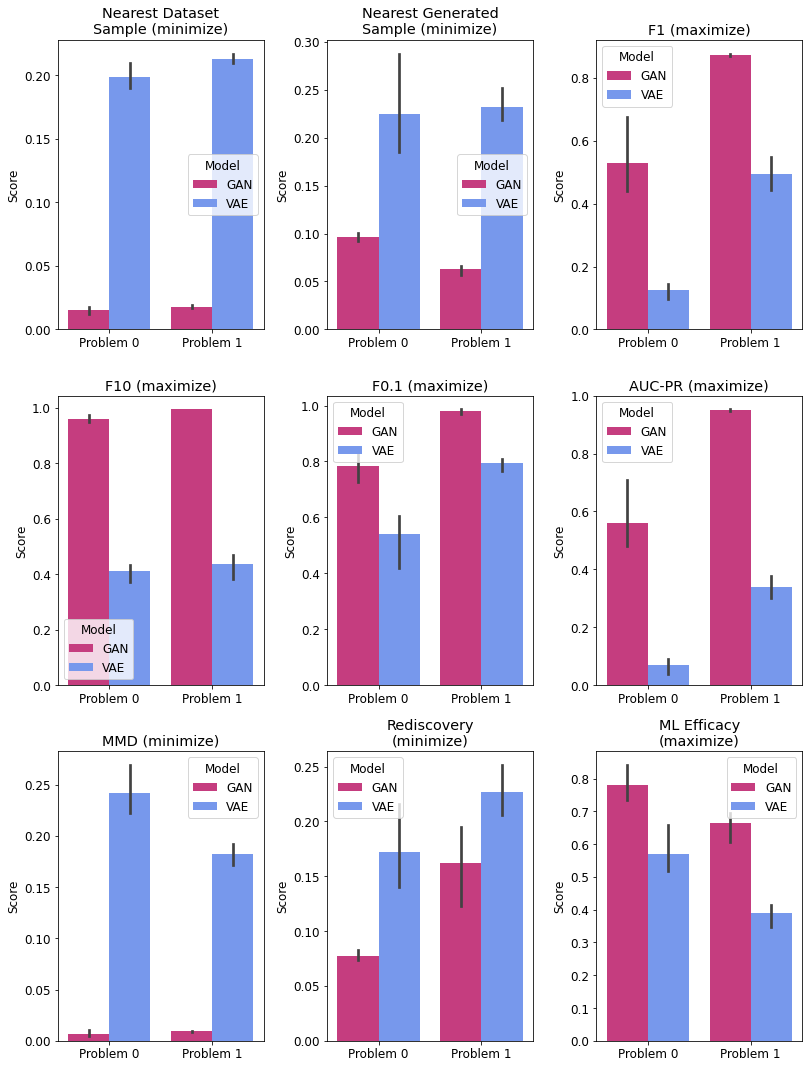

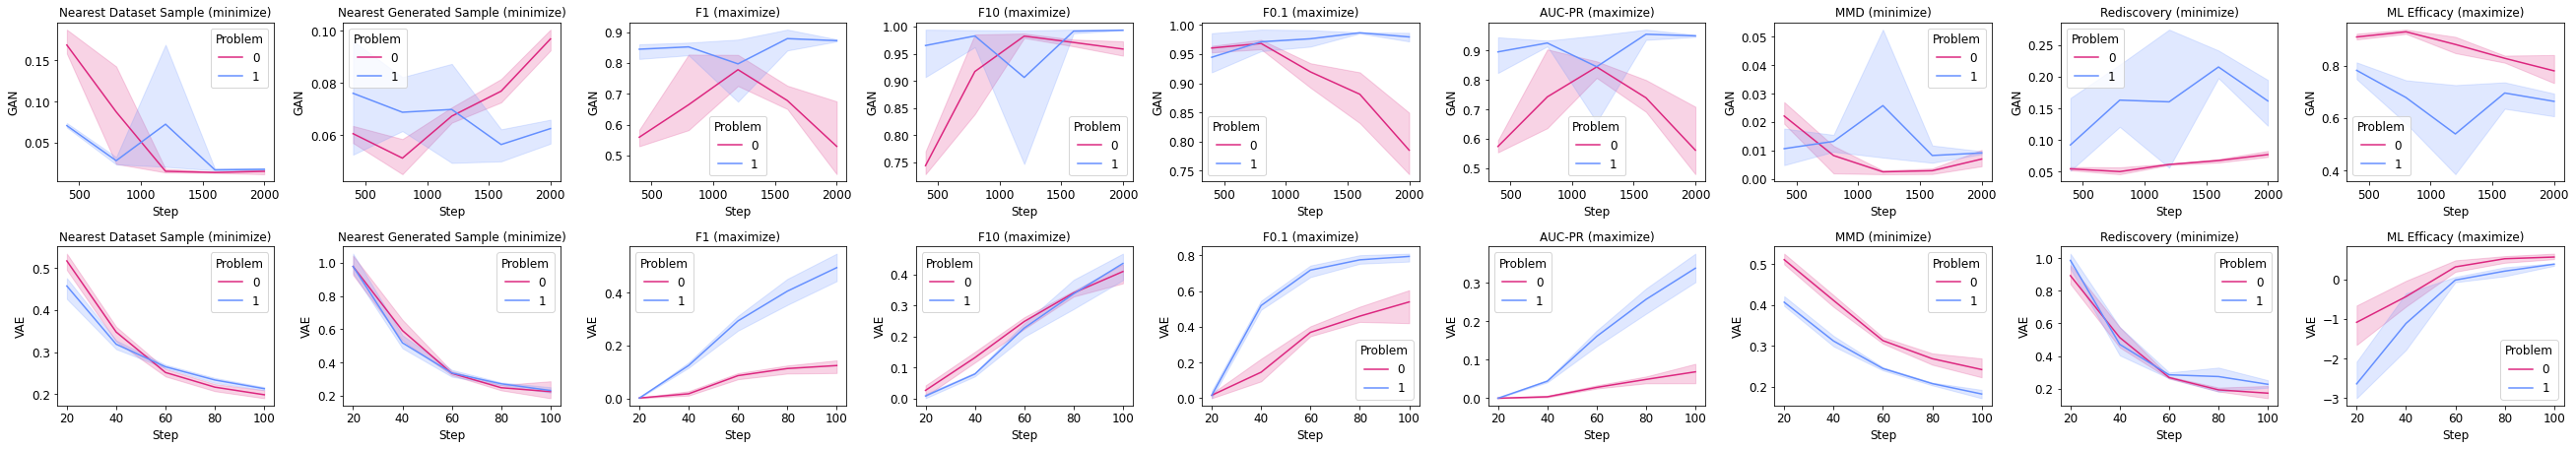

Problem 1 Scores:,GAN,VAE
Nearest Dataset Sample,0.015±0.003,0.199±0.008
Nearest Generated Sample,0.097±0.003,0.225±0.045
F1,0.530±0.104,0.124±0.021
F10,0.959±0.011,0.410±0.027
F0.1,0.785±0.050,0.539±0.084
AUC-PR,0.561±0.104,0.069±0.022
MMD,0.007±0.002,0.242±0.020
Rediscovery,0.077±0.004,0.172±0.032
ML Efficacy,0.781±0.045,0.571±0.062


Problem 2 Scores:,GAN,VAE
Nearest Dataset Sample,0.018±0.001,0.213±0.003
Nearest Generated Sample,0.063±0.004,0.232±0.014
F1,0.872±0.003,0.494±0.043
F10,0.993±0.000,0.436±0.038
F0.1,0.979±0.006,0.794±0.020
AUC-PR,0.949±0.003,0.339±0.030
MMD,0.009±0.000,0.182±0.008
Rediscovery,0.162±0.030,0.226±0.019
ML Efficacy,0.664±0.040,0.391±0.030


Average scores:,GAN,VAE
Nearest Dataset Sample,0.017±0.002,0.206±0.009
Nearest Generated Sample,0.080±0.018,0.228±0.033
F1,0.701±0.187,0.309±0.188
F10,0.976±0.019,0.423±0.036
F0.1,0.882±0.104,0.666±0.141
AUC-PR,0.755±0.208,0.204±0.138
MMD,0.008±0.002,0.212±0.034
Rediscovery,0.119±0.047,0.199±0.038
ML Efficacy,0.722±0.072,0.481±0.103


In [14]:
utils.score(timestr, functions, methods, metrics, numinst, scaling, cond_dist, scorebars, plotscores=True)

**Other Use Cases**

In this notebook, we have demonstrated how to evaluate numerous models on numerous problems in a distribution-matching setting. To evaluate models for other types of problems, such as diversity, constraint satisfaction, performance, and conditioning, please refer to Notebook 3. 